Уравнения каждого отрезка ломаной в общем случае разные. Поскольку
имеется $n$ интервалов $(x_{i-1}, x_i)$, то для каждого из них в качестве уравнения
интерполяционного многочлена используется уравнение прямой,
проходящей через две точки: для $i$-го интервала можно написать уравнение
прямой, проходящей через точки $(x_{i-1}, y_{i-1})$ и $(x_i
, y_i)$,
$$
\frac{y - y_{i-1}}{y_i-y_{i-1}}=\frac{x - x_{i-1}}{x_i-x_{i-1}}
$$
Отсюда $$y = a_ix+b_i, x_{i-1} \leq x \leq x_i;$$

$$a_i=\frac{y_i - y_{i-1}}{x_i-x_{i-1}}, b_i=y_{i-1}-a_ix_{i-1}.$$

Значение y в точке x=2.5: 3.5


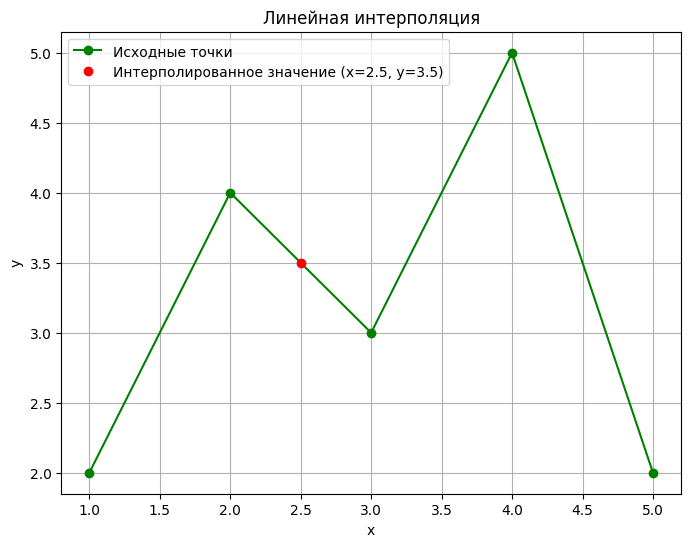

In [24]:
#линейная интерполяция
import numpy as np
import matplotlib.pyplot as plt

#основная функция
def linear_interpolation(points, x):
  for i in range(len(points) - 1):
    x_i_1, y_i_1 = points[i];
    x_i, y_i = points[i + 1];
    if x_i_1 <= x <= x_i:
      return y_i_1 + (x - x_i_1) * (y_i - y_i_1) / (x_i - x_i_1)

#пример использования
points = [(1, 2), (2, 4), (3, 3), (4, 5), (5, 2)]
x = 2.5
y = linear_interpolation(points, x)

#подготовка данных для графика
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]

# Создание графика
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'go-', label='Исходные точки')

plt.plot(x, y, 'ro', label=f'Интерполированное значение (x={x}, y={y})')
print(f"Значение y в точке x={x}: {y}")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная интерполяция')
plt.legend()
plt.grid(True)
plt.show()

**2. Канонический полином**

Вид канонического полинома степени n: $P_n(x)=a_0+a_1x+a_2x^2+\dots + a_{n-1}x^{n-1}+a_nx^n$
Выбор многочлена степени n основан на том факте, что через n+1 точку
проходит единственная кривая степени n. 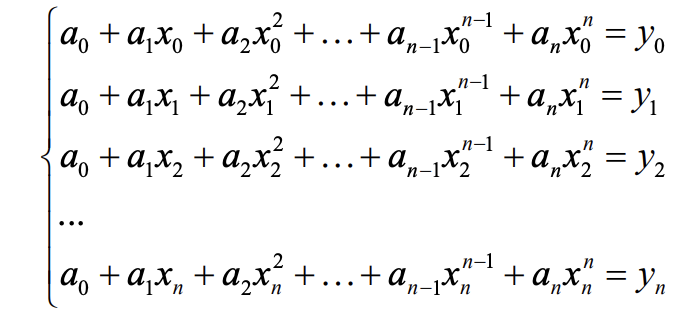

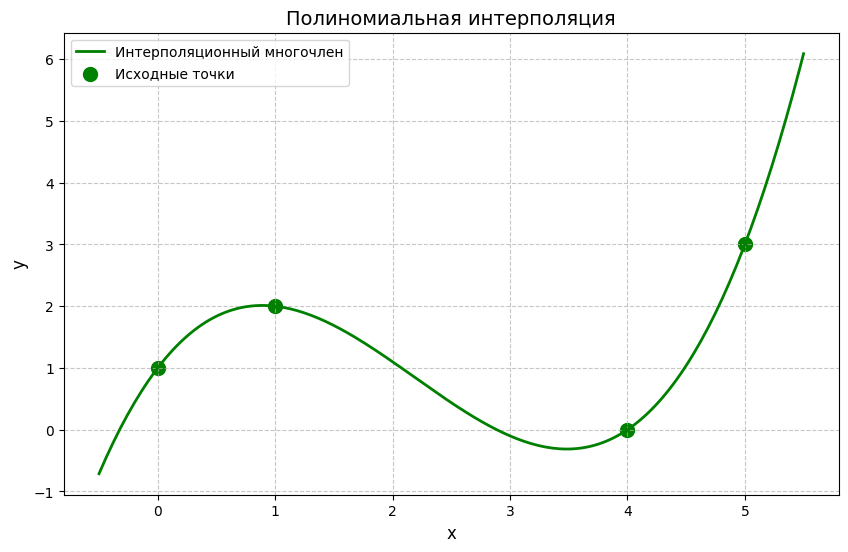

In [34]:
def interpolate_canonical(points):
    #матрица Вандермонда
    n = len(points)
    matrix = np.zeros((n, n))
    for i in range(n):
        x_i = points[i][0]
        for j in range(n):
            matrix[i][j] = pow(x_i, j)
    a = np.linalg.solve(matrix, [point[1] for point in points])
    return a

#алгоритм Горнера для вычисления полинома в данной точке
def evaluate_polynomial(a, x):
    result = 0
    for a_i in reversed(a):
        result = result * x + a_i
    return result

# Пример
points = [(0, 1), (1, 2), (4, 0), (5, 3)]
coefficients = interpolate_canonical(points)

# Создаем точки для построения графика
x_plot = np.linspace(min(p[0] for p in points) - 0.5, max(p[0] for p in points) + 0.5, 200)
y_plot = [evaluate_polynomial(coefficients, x) for x in x_plot]

# Рисуем
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'g-', label='Интерполяционный многочлен', linewidth=2)
plt.scatter([p[0] for p in points], [p[1] for p in points], color='g', marker='o', s=100, label='Исходные точки')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Полиномиальная интерполяция', fontsize=14)
plt.legend(fontsize=10)
plt.show()